# Projet numérique

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Les équations de Lotka-Volterra, ou “modèle proie-prédateur”, sont couramment
utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un
prédateur et sa proie interagissent dans un milieu commun. Elles ont été proposées
indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s’écrivent de
la manière suivante :
$\begin{cases} \dot{x_1} = x_1(\alpha − \beta x_2) \\ \dot{x_2} = −x_2(\gamma − \delta x_1) \end{cases}$


où $x_1$ et $x_2$ désignent le nombre (positif) de proies et de prédateurs respectivement.

## Question 1

$ \dot{x_1} $ et $ \dot{x_2} $ sont les croissances démographiques des deux espèces

$\alpha$ est le taux de reproduction des proies (1)

$\beta$ est le taux de proies (1) mangées par les prédateurs (2)

$\gamma$ est le taux de mortalité des prédateurs

$\delta$ est le profit des prédateurs (2) lié au taux de proies mangées (1)

A l'équilibre (on suppose que tous les facteurs sont non nuls):

On a donc: $\begin{cases} \dot{x_1} =0 \\ \dot{x_2} = 0\end{cases}$

Donc $ (x_1=0$ ou $x_2 = \frac{\alpha}{\beta})$ et $(x_2=0$ ou $x_1 =\frac{\gamma}{\delta})$

Il y a donc 4 cas d'équilibre:

Soit tout le monde est mort: $(x_1,x_2)=(0,0)$. Cet équilibre est instable selon $x_1$ mais stable selon $x_2$. Au total, il est donc instable.

Soit seules les proies sont mortes: $(x_1,x_2)=(0,\frac{\alpha}{\beta})$

Soit seuls les prédateurs sont morts: $(x_1,x_2)=(\frac{\gamma}{\delta},0)$

Soit les deux espèces cohabitent en équilibre $(x_1,x_2)=(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$. L'équilibre est instable

## Question 2

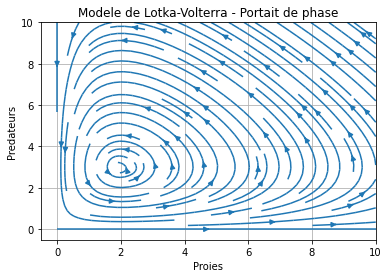

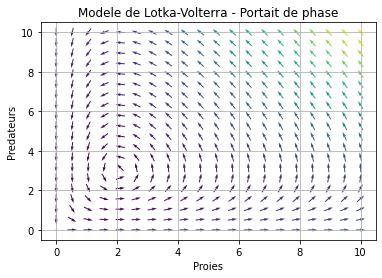

In [4]:
a = 3 #alpha
b = 1 #beta
g = 2 #gamma
d = 1 #delta
X0 = np.array([4,1])
t = np.linspace(0,20,1000)
xmax = 10
ymax = 10
nb_points = 20


def LotkaVolterra(X,t=0):
    return np.array([a*X[0] - b*X[0]*X[1],d*X[0]*X[1] - g*X[1]])


x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)
X1 , Y1  = np.meshgrid(x, y)
DX1, DY1 = LotkaVolterra([X1, Y1]) #calcul des variations de populations
M = (np.hypot(DX1, DY1)) # calcul de la norme d'une fleche, hypotenuse d'un TR         
M [M == 0] = 1. #pour eviter les divisions par zero
DX1 /= M # normalisation de la norme d'une fleche
DY1 /= M

Q = plt.streamplot(X1,Y1,DX1,DY1)
plt.title('Modele de Lotka-Volterra - Portait de phase')
plt.xlabel('Proies')
plt.ylabel('Predateurs')
plt.grid(True)
plt.show()

Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot = 'middle')
plt.title('Modele de Lotka-Volterra - Portait de phase')
plt.xlabel('Proies')
plt.ylabel('Predateurs')
plt.grid(True)
plt.show()

On a ici deux points d'équilibres : $(0,0)$ et $(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$

Interprétation?

## Question 3

Toutes les expressions étant polynomiales, les fonctions sont continûment différentiables.

$\newline$

Si initialement $x_{10}=0$ et $x_{20}>0$:

On a $\dot{x_{10}}=0$ initialement. Donc $\forall t : x_{1}(t)=0$

De même, si $x_{10}>0$ et $x_{20}=0$: $\forall t : x_{2}(t)=0$

$\newline$

Si on a une solution initiale $(x_{10},x_{20})$ avec  $x_{10}>0$ et $x_{20}>0$

Supposons par l'absure que $\exists t: x_1(t)=0$

Le théorème de Cauchy-Lipschitz nous assure par unicité de la solution que $\forall t : x_{1}(t)=0$.

Absurde.

On procède de même si $\exists t: x_2(t)=0$

$x_1$ et $x_2$ étant continues, elles ne croiseront jamais l'axe des abscisses et dont: $\forall t: x_{1}(t)>0$ et $x_{2}(t)>0$


## Question 4

H est une fonction de Lyapunov et est bien définie sur $\mathbf{R}_{+}^{*} \times \mathbf{R}_{+}^{*}$



## Question 5

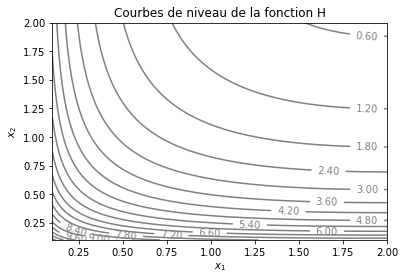

In [5]:
def H(x1,x2):
    return d*x1 - g*np.log(x1) + b*x2 - a*np.log(x2)

x , y = np.meshgrid(np.linspace(0.1,2,201),np.linspace(0.1,2,201))
z = H(x,y)

plt.figure(1)
graphe = plt.contour(x,y,z,20,colors="grey")
plt.clabel(graphe,inline=1,fontsize=10,fmt='%3.2f')
plt.xlabel(r"$x_{1}$")
plt.ylabel(r"$x_{2}$")
plt.title("Courbes de niveau de la fonction H")
plt.show()

## Question 6

## Question 7

## Question 8

## Question 9

## Question 10

## Question 11